<a href="https://colab.research.google.com/github/emiliomercuri/ciencia_dados/blob/main/aulas/2023_09_27_Aula_3_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 3 - Regressão Linear

* Dados de temperatura do Planeta Terra
* Dados de emissão veicular


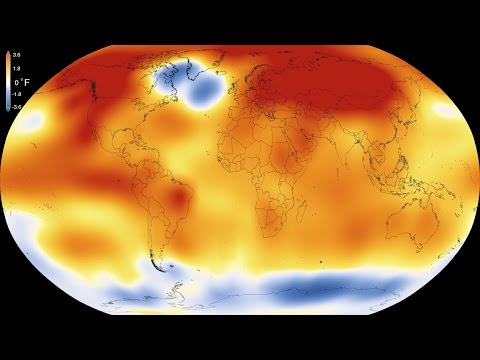

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gGOzHVUQCw0')

In [ ]:
import numpy
from urllib.request import urlretrieve
from matplotlib import pyplot

In [ ]:
URL = 'https://raw.githubusercontent.com/emiliomercuri/ciencia_dados/main/dados/land_global_temperature_anomaly-1880-2016.csv'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv' )

('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x795e38bf7ee0>)

In [ ]:
!head 'land_global_temperature_anomaly-1880-2016.csv'

Global Land Temperature Anomalies, January-December
Units: Degrees Celsius
Base Period: 1901-2000
Missing: -999.0000
Year,Value
1880,-0.47
1881,-0.45
1882,-0.41
1883,-0.60
1884,-0.60


In [ ]:
fname = 'land_global_temperature_anomaly-1880-2016.csv'
year, temp_anomaly = numpy.loadtxt(fname, delimiter=',',skiprows=5,unpack=True)

In [ ]:
year

array([1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887., 1888.,
       1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896., 1897.,
       1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905., 1906.,
       1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914., 1915.,
       1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923., 1924.,
       1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932., 1933.,
       1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942.,
       1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951.,
       1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
       1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007.,

In [ ]:
temp_anomaly

array([-0.47, -0.45, -0.41, -0.6 , -0.6 , -0.52, -0.48, -0.47, -0.46,
       -0.31, -0.49, -0.55, -0.52, -0.56, -0.35, -0.4 , -0.27, -0.29,
       -0.37, -0.18, -0.13, -0.09, -0.33, -0.39, -0.46, -0.42, -0.2 ,
       -0.6 , -0.49, -0.39, -0.33, -0.44, -0.51, -0.34, -0.07, -0.07,
       -0.36, -0.51, -0.37, -0.32, -0.28, -0.06, -0.24, -0.21, -0.26,
       -0.1 ,  0.01, -0.15, -0.1 , -0.4 , -0.08, -0.03, -0.02, -0.34,
       -0.02, -0.14, -0.12, -0.03,  0.17,  0.09,  0.04,  0.11,  0.07,
        0.09,  0.21, -0.08, -0.01,  0.06,  0.06, -0.05, -0.33, -0.07,
       -0.08,  0.17, -0.16, -0.13, -0.42, -0.05,  0.13,  0.05, -0.04,
        0.1 ,  0.16,  0.21, -0.24, -0.13, -0.07, -0.  , -0.11, -0.1 ,
        0.02, -0.04, -0.18,  0.29, -0.21,  0.12, -0.25,  0.21,  0.08,
        0.15,  0.27,  0.49,  0.09,  0.49,  0.05,  0.07,  0.28,  0.41,
        0.55,  0.39,  0.59,  0.53,  0.26,  0.35,  0.45,  0.77,  0.35,
        0.68,  0.96,  0.8 ,  0.64,  0.83,  0.94,  0.89,  0.81,  1.05,
        0.92,  1.1 ,

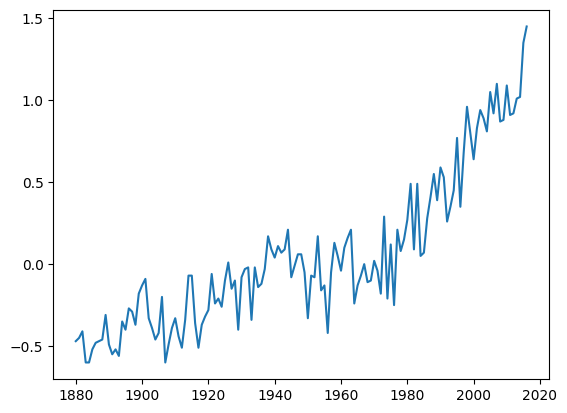

In [ ]:
pyplot.plot(year, temp_anomaly)

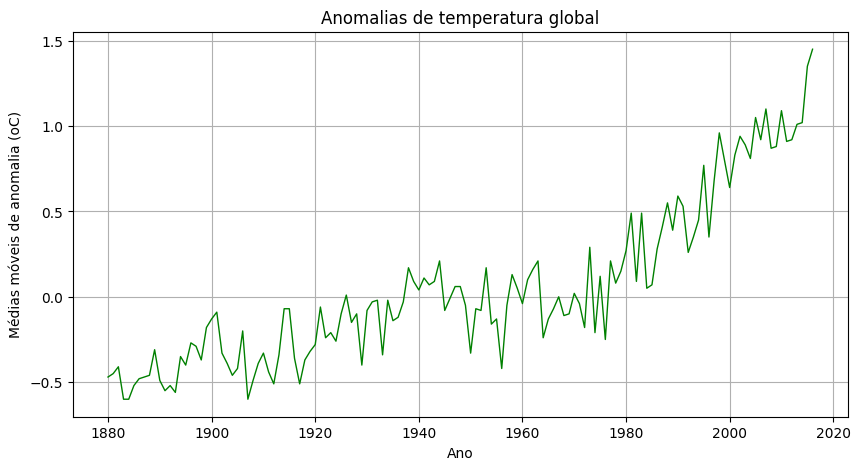

In [ ]:
pyplot.figure(figsize=(10,5))
pyplot.plot(year, temp_anomaly,color='green',linestyle='-',linewidth=1)
pyplot.title('Anomalias de temperatura global')
pyplot.xlabel('Ano')
pyplot.ylabel('Médias móveis de anomalia (oC)')
pyplot.grid();

# Ajuste de Regressão Linear

Vamos ajustar com o Método dos Mínimos Quadrados uma linha reta nos dados!

$y = a_1 x + a_0$

$$
    a_1 = \frac{ \sum_{i=0}^{n} y_{i} (x_i - \bar{x})}{\sum_{i=0}^{n} x_i (x_i - \bar{x})} \quad , \quad a_0  = \bar{y} - a_1\bar{x}
$$

In [ ]:
def valor_medio(vetor):
  '''
  Função para calcular o valor médio de um array (vetor)
  '''
  soma = 0
  for elemento in vetor:
    soma += elemento # soma = soma + elemento
  media = soma/len(vetor)
  return media

In [ ]:
#valor_medio?

In [ ]:
year_mean = valor_medio(year)
temp_anomaly_mean = valor_medio(temp_anomaly)
year_mean, temp_anomaly_mean

(1948.0, 0.05262773722627737)

$$
    a_1 = \frac{ \sum_{i=0}^{n} y_{i} (x_i - \bar{x})}{\sum_{i=0}^{n} x_i (x_i - \bar{x})} \quad , \quad a_0  = \bar{y} - a_1\bar{x}
$$

In [ ]:
a1=numpy.sum(temp_anomaly*(year-year_mean))/numpy.sum(year*(year-year_mean))
a1

0.01037028394347266

In [ ]:
a0 = temp_anomaly_mean - a1*year_mean
a0

-20.148685384658464

In [ ]:
reg = a0 + a1*year

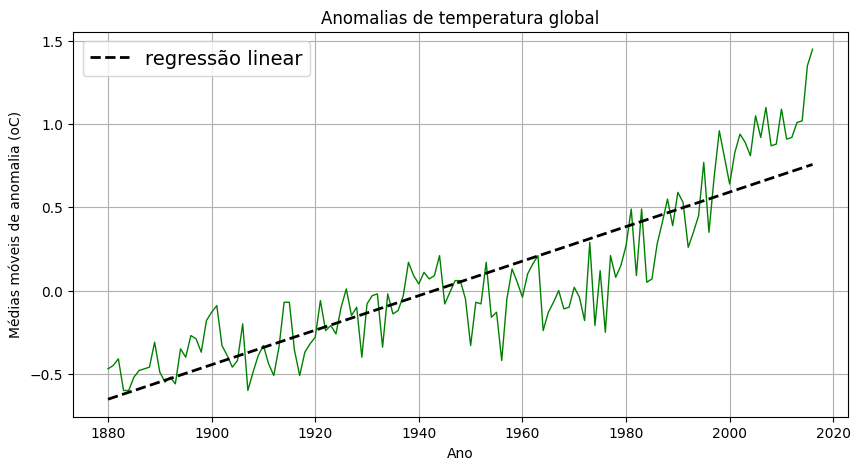

In [ ]:
pyplot.figure(figsize=(10,5))
pyplot.plot(year, temp_anomaly,color='green',linestyle='-',linewidth=1)
pyplot.plot(year,reg,color='black',linestyle='--',linewidth=2,label='regressão linear')
pyplot.title('Anomalias de temperatura global')
pyplot.xlabel('Ano')
pyplot.ylabel('Médias móveis de anomalia (oC)')
pyplot.legend(loc='best',fontsize=14)
pyplot.grid();

# Regressão linear usando NUMPY

In [ ]:
a1_novo, a0_novo = numpy.polyfit(year,temp_anomaly,1)
f_linear = numpy.poly1d((a1_novo, a0_novo))

In [ ]:
print(a1, a1_novo)
print(a0, a0_novo)

0.01037028394347266 0.01037028394347266
-20.148685384658464 -20.14868538465846


In [ ]:
type(f_linear)

numpy.poly1d

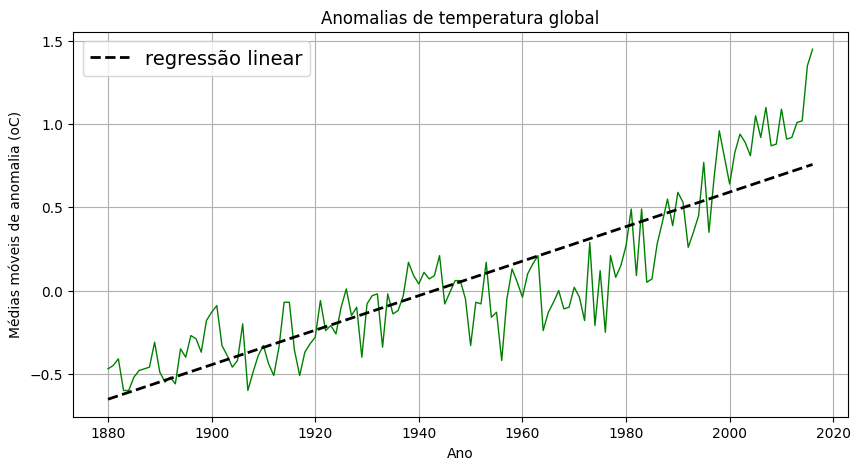

In [ ]:
pyplot.figure(figsize=(10,5))
pyplot.plot(year, temp_anomaly,color='green',linestyle='-',linewidth=1)
pyplot.plot(year,f_linear(year),color='black',linestyle='--',linewidth=2,label='regressão linear')
pyplot.title('Anomalias de temperatura global')
pyplot.xlabel('Ano')
pyplot.ylabel('Médias móveis de anomalia (oC)')
pyplot.legend(loc='best',fontsize=14)
pyplot.grid();

In [ ]:
a2_novo2, a1_novo2, a0_novo2 = numpy.polyfit(year,temp_anomaly,2)
f_quadratica = numpy.poly1d((a2_novo2, a1_novo2, a0_novo2))

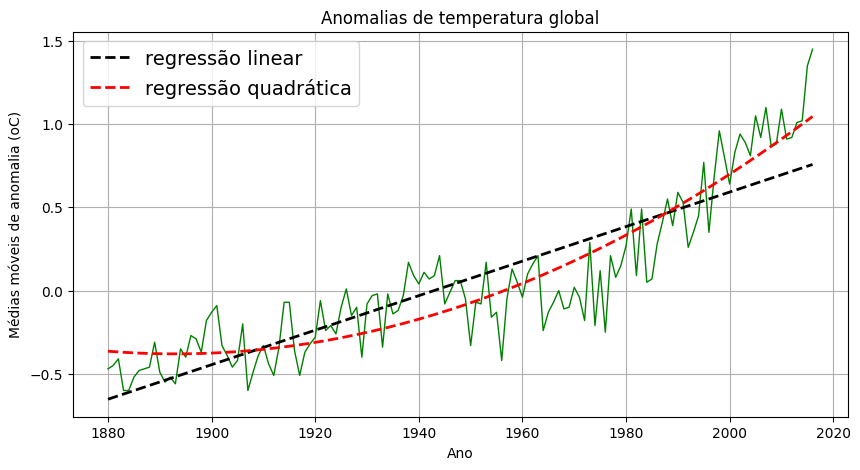

In [ ]:
pyplot.figure(figsize=(10,5))
pyplot.plot(year, temp_anomaly,color='green',linestyle='-',linewidth=1)
pyplot.plot(year,f_linear(year),color='black',linestyle='--',linewidth=2,label='regressão linear')
pyplot.plot(year,f_quadratica(year),color='red',linestyle='--',linewidth=2,label='regressão quadrática')
pyplot.title('Anomalias de temperatura global')
pyplot.xlabel('Ano')
pyplot.ylabel('Médias móveis de anomalia (oC)')
pyplot.legend(loc='best',fontsize=14)
pyplot.grid()
pyplot.savefig('anomalias.tiff',dpi=600)
pyplot.show();

In [ ]:
len(year)

137

In [ ]:
year[100]

1980.0

In [ ]:
a1A, a0A = numpy.polyfit(year[0:100],temp_anomaly[0:100],1)
f_linearA = numpy.poly1d((a1A, a0A))

a1B, a0B = numpy.polyfit(year[100:137],temp_anomaly[100:137],1)
f_linearB = numpy.poly1d((a1B, a0B))

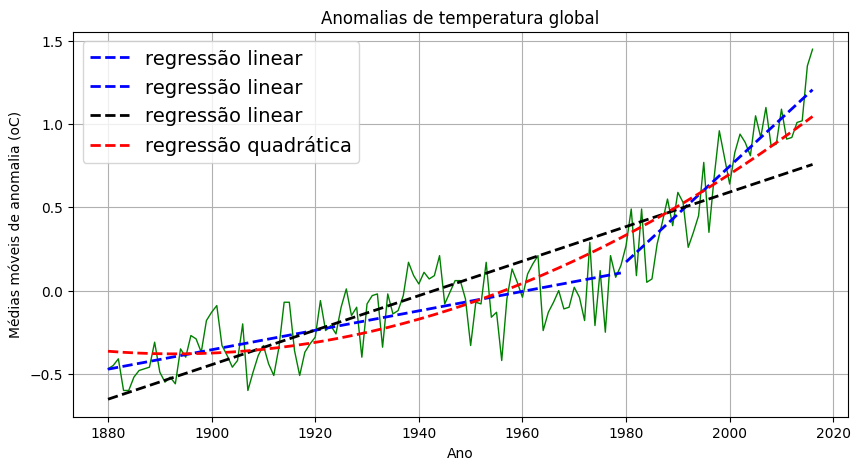

In [ ]:
pyplot.figure(figsize=(10,5))
pyplot.plot(year, temp_anomaly,color='green',linestyle='-',linewidth=1)
pyplot.plot(year[0:100],f_linearA(year[0:100]),color='blue',linestyle='--',linewidth=2,label='regressão linear')
pyplot.plot(year[100:137],f_linearB(year[100:137]),color='blue',linestyle='--',linewidth=2,label='regressão linear')
pyplot.plot(year,f_linear(year),color='black',linestyle='--',linewidth=2,label='regressão linear')
pyplot.plot(year,f_quadratica(year),color='red',linestyle='--',linewidth=2,label='regressão quadrática')
pyplot.title('Anomalias de temperatura global')
pyplot.xlabel('Ano')
pyplot.ylabel('Médias móveis de anomalia (oC)')
pyplot.legend(loc='best',fontsize=14)
pyplot.grid()
pyplot.savefig('anomalias.tiff',dpi=600)
pyplot.show();

In [ ]:
import scipy.stats

In [ ]:
scipy.stats.pearsonr(temp_anomaly, f_linear(year))

PearsonRResult(statistic=0.8749403673678436, pvalue=2.371842370218954e-44)

In [ ]:
scipy.stats.pearsonr(temp_anomaly, f_linear(year))(temp_anomaly, f_quadratica(year))

PearsonRResult(statistic=0.9189836554568219, pvalue=2.0325632594438382e-56)

In [ ]:
scipy.stats.pearsonr?

# Previsão da Emissão de CO2 de carros

Podemos prever a emissão de CO2 de um carro apenas no tamanho do motor?

Com a regressão múlplica podemos incluir mais variáveis, como o peso do carro, para melhorar a previsão.

Considere um dadaset fictício que contém:

* Marca do Carro
* Modelo
* Volume do motor (cm$^3$)
* Peso (kg)
* Emissão de CO2 (g CO$_2$/km)

In [ ]:
import pandas

In [ ]:
df = pandas.read_csv("https://www.dropbox.com/s/yevoao0jiu3d5la/data.csv?dl=1")

In [ ]:
df[0:5]

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [ ]:
import statsmodels.api as sm

# Vamos criar um modelo de Regressão linear múltipla do tipo

$$
y = a_0 x_0 + a_1 x_1 + a_2
$$

## Primeiro caso a_2 = 0

In [ ]:
X = df[['Weight','Volume']]
Y = df['CO2']

In [ ]:
#sm.OLS?

In [ ]:
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

In [ ]:
model.predict([2000,1000])

array([139.29752414])

In [ ]:
model.params

Weight    0.064781
Volume    0.009736
dtype: float64

## Modelo para emissão de CO2

Sendo
* P: Peso (kg)
* V: Volume do motor (cm$^3$)

$$
E_{\rm CO_2} = 0.064781 \, P + 0.009736 \,V
$$

* $E_{\rm CO_2}$: Emissão de CO2 (g CO$_2$/km)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    CO2   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              714.9
Date:                Wed, 27 Sep 2023   Prob (F-statistic):                    1.67e-28
Time:                        14:20:26   Log-Likelihood:                         -149.96
No. Observations:                  36   AIC:                                      303.9
Df Residuals:                      34   BIC:                                      307.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0648      0.013      4.850      0.000       0.038       0.092
Volume         0.0097      0.011      0.919      0.365      -0.012       0.031
==============================================================================
Omnibus:                        2.430   Durbin-Watson:                   0.718
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                2.239
Skew:                           0.550   Prob(JB):                        0.327
Kurtosis:                       2.470   Cond. No.                         13.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
model.params

const     79.694719
Weight     0.007551
Volume     0.007805
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.966
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           0.000411
Time:                        14:21:05   Log-Likelihood:                -114.39
No. Observations:                  36   AIC:                             234.8
Df Residuals:                      33   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.6947      5.564     14.322      0.000      68.374      91.016
Weight         0.0076      0.006      1.173      0.249      -0.006       0.021
Volume         0.0078      0.004      1.948      0.060      -0.000       0.016
==============================================================================
Omnibus:                        4.957   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                1.836
Skew:                          -0.025   Prob(JB):                        0.399
Kurtosis:                       1.895   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""